In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

In [2]:
vessel_name = "OOCL_NEW_YORK"

# 전항지 출항 확인

전항지 출항 지점 확인

In [3]:
import os
 
path_dir = 'voy_path'
 
file_list = os.listdir(path_dir)
file_new_list = []
for i in file_list:
    if "portmis" in i:
        file_new_list.append(i)

In [4]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

# 시각화 툴로 processed된 것들 확인

항로 클러스터링

In [5]:
# dense_upper_china_list = ['COSCO_FOS_VRKR6_23processed'
# ,'AKA_BHUM_9V7282_7processed'
# , 'COSCO_FOS_VRKR6_25processed'
# , 'MSC_LA_SPEZIA_DIGX2_2processed'
# , 'OOCL_NEW_YORK_VRJS2_2processed'
# , 'MSC_WASHINGTON_5LDP4_4processed'
# , 'MSC_SOFIA_PAZ_D5FL9_2processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_26processed'
# , 'OOCL_HAMBURG_VRZK9_6processed'
# , 'SEAMAX_STRATFORD_V7EP2_6processed'
# , 'OOCL_LUXEMBOURG_VRGO3_5processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_25processed'
# , 'MSC_LUCIANA_3FTY3_4processed'
# , 'MSC_RENEE_VRPL2_5processed'
# , 'COSCO_FOS_VRKR6_24processed'
# , 'COSCO_FOS_VRKR6_20processed'
# , 'COSCO_FOS_VRKR6_26processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_23processed'
# , 'OOCL_HAMBURG_VRZK9_5processed']

# OOCL_NEW_YORK_voyages_list = [
#     'COSCO_FOS_VRKR6_2022_20processed', 'COSCO_FOS_VRKR6_2022_23processed',
#     'COSCO_FOS_VRKR6_2022_24processed', 'COSCO_FOS_VRKR6_2022_25processed',
#     'OOCL_NEW_YORK_VRJS2_2022_2processed', 'COSCO_FOS_VRKR6_2022_27processed',
#     'COSCO_FOS_VRKR6_2022_28processed', 'OOCL_NEW_YORK_VRJS2_2022_2processed',
#     'COSCO_FOS_VRKR6_2022_30processed'
# ]

# OOCL_NEW_YORK_voyages_list = [
#     'OOCL_NEW_YORK_VRJS2_2022_2processed', 'AKA_BHUM_9V7282_2022_8processed'
# ]
OOCL_NEW_YORK_voyages_list = [
    'OOCL_NEW_YORK_VRJS2_2022_1processed',
    'OOCL_NEW_YORK_VRJS2_2022_2processed',
    'OOCL_NEW_YORK_VRJS2_2022_3processed'
]

OOCL_LUXEMBOURG_voyages_list = [
    'OOCL_LUXEMBOURG_VRGO3_2022_5processed',
    'OOCL_LUXEMBOURG_VRGO3_2022_6processed'
]

OOCL_GENOA_voyages_list = [
    'OOCL_GENOA_VROK9_2022_3processed', 'OOCL_GENOA_VROK9_2022_5processed'
]

OOCL_HAMBURG_voyages_list = [
    'OOCL_HAMBURG_VRZK9_2022_5processed', 'OOCL_HAMBURG_VRZK9_2022_6processed'
]

SEAMAX_STRATFORD_voyages_list = [
    'SEAMAX_STRATFORD_V7EP2_2022_6processed',
    'SEAMAX_STRATFORD_V7EP2_2022_7processed'
]

ZIM_CHARLESTORN_voyages_list = [
    'ZIM_CHARLESTON_VRUC3_2022_6processed',
    'ZIM_CHARLESTON_VRUC3_2022_7processed'
]

single_voyage_list = [
    'MSC_ARIANE_3FDA3_2022_1processed', 'MSC_DANIT_3FZU8_2022_2processed',
    'MSC_EVA_3EVM7_2022_1processed', 'MSC_EXPRESS_III_A8LG7_2022_1processed',
    'MSC_KANOKO_D5TM3_2023_1processed', 'MSC_LA_SPEZIA_DIGX2_2022_2processed',
    'MSC_VANESSA_HOWD_2023_1processed', 'MSC_VIRGO_CQEB9_2023_2processed',
    'MSC_SOFIA_PAZ_D5FL9_2022_2processed',
    'MSC_WASHINGTON_5LDP4_2022_4processed',
    'MSC_RAVENNA_A8ZU8_2022_3processed', 'MSC_VANDYA_3FDW4_2022_2processed',
    'MSC_RENEE_VRPL2_2022_5processed', 'SEASPAN_OCEANIA_VRBI2_2023_1processed',
    'SEASPAN_BREEZE_VRNL8_2023_1processed', 'VALENCE_9HA3398_2023_1processed'
]

In [6]:
upper_china_path_dir = 'voy_path/upper_china/processed/'

In [7]:
# 가는 길인데 굳이 오래 돌아갈 필요는 없잖아 알고리즘
def optimal_next_point(current_position, shortest_point_idx, shortest_distance,
                       path_df):
    posi_c = current_position
    latitude_i = path_df.loc[shortest_point_idx, "latitude"]
    longitude_i = path_df.loc[shortest_point_idx, "longitude"]
    posi_i = (latitude_i, longitude_i)
    min_d = shortest_distance
    n = shortest_point_idx + 1
    while True:
        try:
            latitude_n = path_df.loc[n, "latitude"]
            longitude_n = path_df.loc[n, "longitude"]
            posi_n = (latitude_n, longitude_n)
            distance = haversine(posi_c, posi_n, unit="km")
            if n == shortest_point_idx + 1:
                path_distance = haversine(posi_i, posi_n, unit="km")
                paths_distance = path_distance
            else:
                path_distance = haversine(posi_n, posi_previous_n, unit="km")
                paths_distance += path_distance

            if distance < (paths_distance + min_d):
                optimal_next_point_idx = n
                return optimal_next_point_idx
            elif n == path_df.index[-1]:
                print("no better optimal_point")
                return shortest_point_idx + 1
            else:
                n = n + 1
                posi_previous_n = posi_n
        except:
            print("no better optimal_point")
            return shortest_point_idx + 1

In [8]:
# 인덱스 번호를 가지고 항로의 segment 번호를 찾음
# 만약 segment의 마지막 번호라면 seg_no를 하나 더한다.

def find_segment_no(optimal_point_idx, path_df, the_number_of_segment):
    seg_no = optimal_point_idx // (len(path_df) / the_number_of_segment)
    next_no = (optimal_point_idx + 1) // (len(path_df) / the_number_of_segment)
    if seg_no != next_no:
        return int(next_no)
    else:
        return int(seg_no)

In [9]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [10]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - hour) * 60)
    second = ((distance / km_h - hour) * 60 - minute) * 60
    duration = datetime.timedelta(hours=hour,minutes=minute, seconds=second)
    return duration

# Tianjin to Busan PNIT

## OOCL_NEW_YORK

In [11]:
coordinates_array = pd.DataFrame(data={"latitude" : [],"longitude" : []})

for i in OOCL_NEW_YORK_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    coordinates_array = coordinates_array.append(df[["latitude","longitude"]], ignore_index=True)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from shapely.geometry import LineString

In [14]:
from scipy import interpolate
import pandas as pd

## below 3 knot 제거

In [15]:
interpolation_number = "2000"

### interpolation 2000

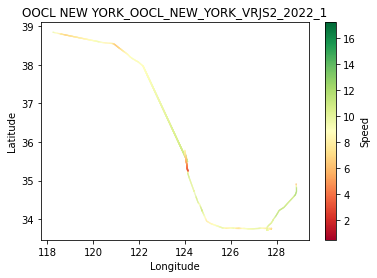

보간법 전 일반 평균 속도 : 9.433653846153845
보간법 전 일반 속도 표준편차: 1.577918659655788
보간법 전 저속 제거 평균 속도 : 9.433653846153845
보간법 전 저속 제거 속도 표준편차: 1.577918659655788
-
보간법 후 일반 평균 속도 : 9.055060851234295
보간법 후 일반 속도 표준편차: 1.5068284261246045
보간법 후 저속 제거 평균 속도 : 9.055060851234295
보간법 후 저속 제거 속도 표준편차: 1.5068284261246045


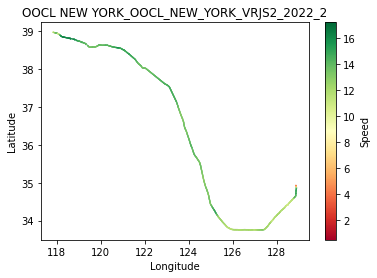

보간법 전 일반 평균 속도 : 13.148247978436657
보간법 전 일반 속도 표준편차: 1.421016686831533
보간법 전 저속 제거 평균 속도 : 13.148247978436657
보간법 전 저속 제거 속도 표준편차: 1.421016686831533
-
보간법 후 일반 평균 속도 : 13.336259410642818
보간법 후 일반 속도 표준편차: 1.304434315939391
보간법 후 저속 제거 평균 속도 : 13.336259410642818
보간법 후 저속 제거 속도 표준편차: 1.304434315939391


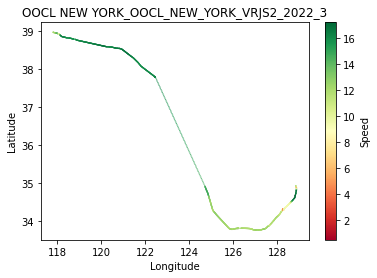

보간법 전 일반 평균 속도 : 12.789285714285715
보간법 전 일반 속도 표준편차: 2.479073208239914
보간법 전 저속 제거 평균 속도 : 12.789285714285715
보간법 전 저속 제거 속도 표준편차: 2.479073208239914
-
보간법 후 일반 평균 속도 : 13.859110928864379
보간법 후 일반 속도 표준편차: 2.9169778389505647
보간법 후 저속 제거 평균 속도 : 13.859110928864379
보간법 후 저속 제거 속도 표준편차: 2.9169778389505647


In [16]:
max_speed_list = []
min_speed_list = []
for i in OOCL_NEW_YORK_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_NEW_YORK_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [17]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_NEW_YORK_VRJS2_2022_1',
 'OOCL_NEW_YORK_VRJS2_2022_2',
 'OOCL_NEW_YORK_VRJS2_2022_3']

In [18]:
high_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_NEW_YORK_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [19]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [20]:
result_df_dict=  {
    "experiment_no" : [],
    "mean_speed" : [],
    "max_speed" : []
}

# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [21]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.977437,38.923934,11.084237
2,1.667819e+09,117.991574,38.921934,11.168474
3,1.667819e+09,118.005711,38.919934,11.252711
4,1.667819e+09,118.019430,38.917983,11.188368
...,...,...,...,...
1995,1.668138e+09,128.866992,34.894323,8.503004
1996,1.668138e+09,128.865347,34.901075,8.261692
1997,1.668138e+09,128.862609,34.908995,7.941128
1998,1.668138e+09,128.859871,34.916914,7.620564


In [22]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 20

In [23]:
the_number_of_segment = 20

In [24]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [25]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [26]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

12.130636953688242
12.983876403519918
12.907148854720075
13.324854534744224
13.288637723623797
13.054935245388712
13.318274966852359
13.45517011104384
13.175782252206618
13.392897135268614
13.097049876597815
12.205611381518981
11.207129154094948
10.01219872340552
11.2433542331608
11.048298166568014
10.99462775318456
9.085098268260682
9.54751709602219
12.196442437740027


### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [27]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [28]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [29]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:15:01.966210
평균: 0 days 01:19:15.240337746


In [30]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
173,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.7801,34.8754,13.3,153.0,2022-11-10 14:21:49.355836,2022-11-10 05:20:43.000000,2022-11-09 10:19:51,under way using engine,368.398902,660.047379,2022-11-11 12:29:45.141666,2022-11-11 12:29:16.869978,0 days 00:00:28.271688
231,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.7838,33.8177,11.5,107.0,2022-11-10 20:40:22.953364,2022-11-10 11:39:40.000000,2022-11-09 10:19:51,under way using engine,306.556798,514.115728,2022-11-11 12:30:09.169356,2022-11-11 12:29:16.869978,0 days 00:00:52.299378
316,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9530,34.1091,11.7,60.0,2022-11-11 06:20:49.774873,2022-11-10 21:18:43,2022-11-10 08:31:50,under way using engine,124.311925,209.600764,2022-11-11 12:28:20.368625,2022-11-11 12:29:16.869978,0 days 00:00:56.501353
296,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.6386,33.8916,12.1,35.0,2022-11-11 04:34:49.859759,2022-11-10 19:34:29,2022-11-10 04:19:51,under way using engine,161.544701,275.766671,2022-11-11 12:28:12.975026,2022-11-11 12:29:16.869978,0 days 00:01:03.894952
52,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,120.2367,38.6246,14.3,89.0,2022-11-09 14:20:07.069314,2022-11-09 05:14:54.000000,2022-11-09 05:19:55,under way using engine,865.029794,1630.304568,2022-11-11 12:30:27.426633,2022-11-11 12:29:16.869978,0 days 00:01:10.556655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.3313,34.3254,11.8,60.0,2022-11-11 08:16:55.122296,2022-11-10 23:14:09.000000,2022-11-10 10:55:50,under way using engine,84.410101,142.734927,2022-11-11 08:16:55.122296,2022-11-11 12:29:16.869978,0 days 04:12:21.747682
337,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.3199,34.3198,11.8,60.0,2022-11-11 08:11:52.157248,2022-11-10 23:10:49.000000,2022-11-10 10:55:50,under way using engine,85.492809,144.565754,2022-11-11 08:11:52.157248,2022-11-11 12:29:16.869978,0 days 04:17:24.712730
336,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.3039,34.3120,11.8,60.0,2022-11-11 08:06:48.995233,2022-11-10 23:06:10.000000,2022-11-10 10:55:50,under way using engine,87.012814,147.136037,2022-11-11 08:06:48.995233,2022-11-11 12:29:16.869978,0 days 04:22:27.874745
335,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2863,34.3033,11.7,60.0,2022-11-11 08:01:46.615792,2022-11-10 23:01:01.000000,2022-11-10 10:55:50,under way using engine,88.703761,149.562289,2022-11-11 08:01:46.615792,2022-11-11 12:29:16.869978,0 days 04:27:30.254186


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [31]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [32]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [33]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:15:01.966210
평균: 0 days 01:19:15.240337746


In [34]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
173,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.7801,34.8754,13.3,153.0,2022-11-10 14:21:49.355836,2022-11-10 05:20:43.000000,2022-11-09 10:19:51,under way using engine,368.398902,660.047379,2022-11-11 12:29:45.141666,2022-11-11 12:29:16.869978,0 days 00:00:28.271688
231,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.7838,33.8177,11.5,107.0,2022-11-10 20:40:22.953364,2022-11-10 11:39:40.000000,2022-11-09 10:19:51,under way using engine,306.556798,514.115728,2022-11-11 12:30:09.169356,2022-11-11 12:29:16.869978,0 days 00:00:52.299378
316,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9530,34.1091,11.7,60.0,2022-11-11 06:20:49.774873,2022-11-10 21:18:43,2022-11-10 08:31:50,under way using engine,124.311925,209.600764,2022-11-11 12:28:20.368625,2022-11-11 12:29:16.869978,0 days 00:00:56.501353
296,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.6386,33.8916,12.1,35.0,2022-11-11 04:34:49.859759,2022-11-10 19:34:29,2022-11-10 04:19:51,under way using engine,161.544701,275.766671,2022-11-11 12:28:12.975026,2022-11-11 12:29:16.869978,0 days 00:01:03.894952
52,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,120.2367,38.6246,14.3,89.0,2022-11-09 14:20:07.069314,2022-11-09 05:14:54.000000,2022-11-09 05:19:55,under way using engine,865.029794,1630.304568,2022-11-11 12:30:27.426633,2022-11-11 12:29:16.869978,0 days 00:01:10.556655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.3313,34.3254,11.8,60.0,2022-11-11 08:16:55.122296,2022-11-10 23:14:09.000000,2022-11-10 10:55:50,under way using engine,84.410101,142.734927,2022-11-11 08:16:55.122296,2022-11-11 12:29:16.869978,0 days 04:12:21.747682
337,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.3199,34.3198,11.8,60.0,2022-11-11 08:11:52.157248,2022-11-10 23:10:49.000000,2022-11-10 10:55:50,under way using engine,85.492809,144.565754,2022-11-11 08:11:52.157248,2022-11-11 12:29:16.869978,0 days 04:17:24.712730
336,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.3039,34.3120,11.8,60.0,2022-11-11 08:06:48.995233,2022-11-10 23:06:10.000000,2022-11-10 10:55:50,under way using engine,87.012814,147.136037,2022-11-11 08:06:48.995233,2022-11-11 12:29:16.869978,0 days 04:22:27.874745
335,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2863,34.3033,11.7,60.0,2022-11-11 08:01:46.615792,2022-11-10 23:01:01.000000,2022-11-10 10:55:50,under way using engine,88.703761,149.562289,2022-11-11 08:01:46.615792,2022-11-11 12:29:16.869978,0 days 04:27:30.254186


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [35]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_aka_bhum_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.977437,38.923934,11.084237
2,1.667819e+09,117.991574,38.921934,11.168474
3,1.667819e+09,118.005711,38.919934,11.252711
4,1.667819e+09,118.019430,38.917983,11.188368
...,...,...,...,...
1995,1.668138e+09,128.866992,34.894323,8.503004
1996,1.668138e+09,128.865347,34.901075,8.261692
1997,1.668138e+09,128.862609,34.908995,7.941128
1998,1.668138e+09,128.859871,34.916914,7.620564


In [36]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 30

In [37]:
the_number_of_segment = 30

In [38]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [39]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [40]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

11.503109651517654
13.40853722679028
12.767437607450523
12.792762288675588
13.059960278608878
13.446111271256845
13.381347084898541
13.092550682582507
13.062923955698064
13.25917733292712
13.429820494223327
13.462154862129761
13.17138533059112
13.22202905909939
13.43325928183823
13.262374221502991
12.810878475261127
12.07960822984609
11.594228939645268
10.907276105645057
9.697920625866484
11.011437797666817
11.142828430338145
11.11856829089849
10.876933819660218
10.946823580146905
9.018058045796993
8.815245855511403
10.134536396285842
13.377791990300494


### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [41]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [42]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [43]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:10:56.663043
평균: 0 days 00:57:03.610567980


In [44]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
223,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.6518,33.8933,12.1,125.0,2022-11-10 20:00:00.332455,2022-11-10 10:58:51.000000,2022-11-09 10:19:51,under way using engine,314.183088,536.329719,2022-11-11 12:29:09.764372,2022-11-11 12:29:16.869978,0 days 00:00:07.105606
285,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.4576,33.7767,12.0,53.0,2022-11-11 03:39:18.795557,2022-11-10 18:38:21,2022-11-10 04:19:51,under way using engine,182.249736,310.090618,2022-11-11 12:28:51.694100,2022-11-11 12:29:16.869978,0 days 00:00:25.175878
139,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.1853,35.8527,13.8,152.0,2022-11-10 09:20:49.426136,2022-11-10 00:20:29.000000,2022-11-09 10:19:51,under way using engine,431.252478,791.676612,2022-11-11 12:30:07.826832,2022-11-11 12:29:16.869978,0 days 00:00:50.956854
66,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,120.8481,38.5516,15.2,94.0,2022-11-09 16:16:12.765057,2022-11-09 07:15:43,2022-11-09 07:01:52,under way using engine,813.740252,1614.646412,2022-11-11 12:30:08.191769,2022-11-11 12:29:16.869978,0 days 00:00:51.321791
211,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.1736,34.2661,14.8,144.0,2022-11-10 17:33:36.569249,2022-11-10 08:28:23.000000,2022-11-09 10:19:51,under way using engine,342.653674,664.134687,2022-11-11 12:28:17.726596,2022-11-11 12:29:16.869978,0 days 00:00:59.143382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.7682,38.7821,16.0,101.0,2022-11-09 11:08:18.622260,2022-11-09 02:07:27.000000,2022-11-09 02:07:55,under way using engine,988.691290,2060.864746,2022-11-11 15:18:29.074227,2022-11-11 12:29:16.869978,0 days 02:49:12.204249
348,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.5770,34.4706,11.2,57.0,2022-11-11 09:37:40.216301,2022-11-11 00:37:14.000000,2022-11-11 12:19:52,under way using engine,59.747367,99.505898,2022-11-11 09:37:40.216301,2022-11-11 12:29:16.869978,0 days 02:51:36.653677
116,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,123.8132,36.4564,13.4,153.0,2022-11-10 06:24:09.271557,2022-11-09 21:23:38,2022-11-09 09:19:51,under way using engine,481.199464,866.200963,2022-11-11 09:33:27.672253,2022-11-11 12:29:16.869978,0 days 02:55:49.197725
347,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.5535,34.4561,11.2,55.0,2022-11-11 09:32:37.447544,2022-11-11 00:29:32.000000,2022-11-11 12:19:52,under way using engine,62.057821,103.353829,2022-11-11 09:32:37.447544,2022-11-11 12:29:16.869978,0 days 02:56:39.422434


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [45]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [46]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [47]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:10:56.663043
평균: 0 days 00:57:03.610567980


In [48]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
223,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.6518,33.8933,12.1,125.0,2022-11-10 20:00:00.332455,2022-11-10 10:58:51.000000,2022-11-09 10:19:51,under way using engine,314.183088,536.329719,2022-11-11 12:29:09.764372,2022-11-11 12:29:16.869978,0 days 00:00:07.105606
285,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.4576,33.7767,12.0,53.0,2022-11-11 03:39:18.795557,2022-11-10 18:38:21,2022-11-10 04:19:51,under way using engine,182.249736,310.090618,2022-11-11 12:28:51.694100,2022-11-11 12:29:16.869978,0 days 00:00:25.175878
139,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.1853,35.8527,13.8,152.0,2022-11-10 09:20:49.426136,2022-11-10 00:20:29.000000,2022-11-09 10:19:51,under way using engine,431.252478,791.676612,2022-11-11 12:30:07.826832,2022-11-11 12:29:16.869978,0 days 00:00:50.956854
66,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,120.8481,38.5516,15.2,94.0,2022-11-09 16:16:12.765057,2022-11-09 07:15:43,2022-11-09 07:01:52,under way using engine,813.740252,1614.646412,2022-11-11 12:30:08.191769,2022-11-11 12:29:16.869978,0 days 00:00:51.321791
211,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.1736,34.2661,14.8,144.0,2022-11-10 17:33:36.569249,2022-11-10 08:28:23.000000,2022-11-09 10:19:51,under way using engine,342.653674,664.134687,2022-11-11 12:28:17.726596,2022-11-11 12:29:16.869978,0 days 00:00:59.143382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.7682,38.7821,16.0,101.0,2022-11-09 11:08:18.622260,2022-11-09 02:07:27.000000,2022-11-09 02:07:55,under way using engine,988.691290,2060.864746,2022-11-11 15:18:29.074227,2022-11-11 12:29:16.869978,0 days 02:49:12.204249
348,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.5770,34.4706,11.2,57.0,2022-11-11 09:37:40.216301,2022-11-11 00:37:14.000000,2022-11-11 12:19:52,under way using engine,59.747367,99.505898,2022-11-11 09:37:40.216301,2022-11-11 12:29:16.869978,0 days 02:51:36.653677
116,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,123.8132,36.4564,13.4,153.0,2022-11-10 06:24:09.271557,2022-11-09 21:23:38,2022-11-09 09:19:51,under way using engine,481.199464,866.200963,2022-11-11 09:33:27.672253,2022-11-11 12:29:16.869978,0 days 02:55:49.197725
347,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.5535,34.4561,11.2,55.0,2022-11-11 09:32:37.447544,2022-11-11 00:29:32.000000,2022-11-11 12:19:52,under way using engine,62.057821,103.353829,2022-11-11 09:32:37.447544,2022-11-11 12:29:16.869978,0 days 02:56:39.422434


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [49]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_aka_bhum_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.977437,38.923934,11.084237
2,1.667819e+09,117.991574,38.921934,11.168474
3,1.667819e+09,118.005711,38.919934,11.252711
4,1.667819e+09,118.019430,38.917983,11.188368
...,...,...,...,...
1995,1.668138e+09,128.866992,34.894323,8.503004
1996,1.668138e+09,128.865347,34.901075,8.261692
1997,1.668138e+09,128.862609,34.908995,7.941128
1998,1.668138e+09,128.859871,34.916914,7.620564


In [50]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 40

In [51]:
the_number_of_segment = 40

In [52]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [53]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [54]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

10.964941101726243
13.296332805650241
13.361311981673582
12.606440825366262
12.74276531543452
13.071532394005636
13.110423060203475
13.53928600928498
13.399468634239417
13.177806813008173
13.002334850000802
13.107535640776623
13.25341138223082
13.383138551473897
13.485403217268406
13.424937004819277
13.160068819166995
13.191495685246243
13.293755166060171
13.492039104477053
13.252723932914018
12.941375820281614
12.310182710962351
12.101040052075621
11.478661666227563
10.935596641962343
10.354513692408979
9.669883754402063
11.212377660018
11.274330806303597
11.010010345854605
11.086585987281426
10.821188742091449
11.168066764277667
9.98154164768819
8.188654888833176
9.053155665218647
10.04187852682573
12.290933888020177
12.101950987459874


### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [55]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [56]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [57]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 04:37:32.189502
평균: 0 days 01:01:26.217824467


In [58]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
298,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.6685,33.9148,12.2,40.0,2022-11-11 04:44:55.931326,2022-11-10 19:44:31.000000,2022-11-10 04:19:51,under way using engine,157.782823,270.265479,2022-11-11 12:29:04.777264,2022-11-11 12:29:16.869978,0 days 00:00:12.092714
317,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9750,34.1209,11.9,60.0,2022-11-11 06:25:52.227807,2022-11-10 21:25:29,2022-11-10 08:31:50,under way using engine,122.014233,206.947737,2022-11-11 12:28:29.563693,2022-11-11 12:29:16.869978,0 days 00:00:47.306285
192,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.9452,34.5494,13.6,165.0,2022-11-10 15:57:43.921303,2022-11-10 06:57:22.000000,2022-11-09 10:19:51,under way using engine,356.969996,648.804075,2022-11-11 12:30:08.429279,2022-11-11 12:29:16.869978,0 days 00:00:51.559301
265,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.7937,33.7580,12.1,91.0,2022-11-11 00:57:47.860815,2022-11-10 15:55:29.000000,2022-11-10 03:43:51,under way using engine,229.608344,391.955466,2022-11-11 12:30:11.555762,2022-11-11 12:29:16.869978,0 days 00:00:54.685784
234,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.8397,33.8000,11.7,107.0,2022-11-10 20:55:31.314795,2022-11-10 11:55:02,2022-11-09 10:19:51,under way using engine,302.771182,510.498658,2022-11-11 12:31:01.627258,2022-11-11 12:29:16.869978,0 days 00:01:44.757280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 15:32:57.912819,2022-11-11 12:29:16.869978,0 days 03:03:41.042841
36,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,119.4482,38.5885,13.9,122.0,2022-11-09 11:28:30.396253,2022-11-09 02:27:32.000000,2022-11-09 02:25:53,under way using engine,925.927417,1708.490263,2022-11-11 15:33:47.732620,2022-11-11 12:29:16.869978,0 days 03:04:30.862642
23,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.9376,38.7416,15.1,102.0,2022-11-09 09:37:27.750161,2022-11-09 00:37:06.000000,2022-11-09 12:26:35,under way using engine,973.395113,1919.985666,2022-11-11 15:35:58.187381,2022-11-11 12:29:16.869978,0 days 03:06:41.317403
11,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.3786,38.8287,16.2,95.0,2022-11-09 08:01:33.390655,2022-11-08 22:56:18.000000,2022-11-08 10:55:54,under way using engine,1021.941799,2157.461137,2022-11-11 15:48:06.360878,2022-11-11 12:29:16.869978,0 days 03:18:49.490900


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [59]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [60]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [61]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 04:37:32.189502
평균: 0 days 01:01:26.217824467


In [62]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
298,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.6685,33.9148,12.2,40.0,2022-11-11 04:44:55.931326,2022-11-10 19:44:31.000000,2022-11-10 04:19:51,under way using engine,157.782823,270.265479,2022-11-11 12:29:04.777264,2022-11-11 12:29:16.869978,0 days 00:00:12.092714
317,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9750,34.1209,11.9,60.0,2022-11-11 06:25:52.227807,2022-11-10 21:25:29,2022-11-10 08:31:50,under way using engine,122.014233,206.947737,2022-11-11 12:28:29.563693,2022-11-11 12:29:16.869978,0 days 00:00:47.306285
192,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.9452,34.5494,13.6,165.0,2022-11-10 15:57:43.921303,2022-11-10 06:57:22.000000,2022-11-09 10:19:51,under way using engine,356.969996,648.804075,2022-11-11 12:30:08.429279,2022-11-11 12:29:16.869978,0 days 00:00:51.559301
265,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.7937,33.7580,12.1,91.0,2022-11-11 00:57:47.860815,2022-11-10 15:55:29.000000,2022-11-10 03:43:51,under way using engine,229.608344,391.955466,2022-11-11 12:30:11.555762,2022-11-11 12:29:16.869978,0 days 00:00:54.685784
234,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.8397,33.8000,11.7,107.0,2022-11-10 20:55:31.314795,2022-11-10 11:55:02,2022-11-09 10:19:51,under way using engine,302.771182,510.498658,2022-11-11 12:31:01.627258,2022-11-11 12:29:16.869978,0 days 00:01:44.757280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 15:32:57.912819,2022-11-11 12:29:16.869978,0 days 03:03:41.042841
36,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,119.4482,38.5885,13.9,122.0,2022-11-09 11:28:30.396253,2022-11-09 02:27:32.000000,2022-11-09 02:25:53,under way using engine,925.927417,1708.490263,2022-11-11 15:33:47.732620,2022-11-11 12:29:16.869978,0 days 03:04:30.862642
23,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.9376,38.7416,15.1,102.0,2022-11-09 09:37:27.750161,2022-11-09 00:37:06.000000,2022-11-09 12:26:35,under way using engine,973.395113,1919.985666,2022-11-11 15:35:58.187381,2022-11-11 12:29:16.869978,0 days 03:06:41.317403
11,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.3786,38.8287,16.2,95.0,2022-11-09 08:01:33.390655,2022-11-08 22:56:18.000000,2022-11-08 10:55:54,under way using engine,1021.941799,2157.461137,2022-11-11 15:48:06.360878,2022-11-11 12:29:16.869978,0 days 03:18:49.490900


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [63]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_aka_bhum_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.977437,38.923934,11.084237
2,1.667819e+09,117.991574,38.921934,11.168474
3,1.667819e+09,118.005711,38.919934,11.252711
4,1.667819e+09,118.019430,38.917983,11.188368
...,...,...,...,...
1995,1.668138e+09,128.866992,34.894323,8.503004
1996,1.668138e+09,128.865347,34.901075,8.261692
1997,1.668138e+09,128.862609,34.908995,7.941128
1998,1.668138e+09,128.859871,34.916914,7.620564


In [64]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 40

In [65]:
the_number_of_segment = 40

In [66]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [67]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [68]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

10.964941101726243
13.296332805650241
13.361311981673582
12.606440825366262
12.74276531543452
13.071532394005636
13.110423060203475
13.53928600928498
13.399468634239417
13.177806813008173
13.002334850000802
13.107535640776623
13.25341138223082
13.383138551473897
13.485403217268406
13.424937004819277
13.160068819166995
13.191495685246243
13.293755166060171
13.492039104477053
13.252723932914018
12.941375820281614
12.310182710962351
12.101040052075621
11.478661666227563
10.935596641962343
10.354513692408979
9.669883754402063
11.212377660018
11.274330806303597
11.010010345854605
11.086585987281426
10.821188742091449
11.168066764277667
9.98154164768819
8.188654888833176
9.053155665218647
10.04187852682573
12.290933888020177
12.101950987459874


### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [69]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [70]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [71]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 04:37:32.189502
평균: 0 days 01:01:26.217824467


In [72]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
298,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.6685,33.9148,12.2,40.0,2022-11-11 04:44:55.931326,2022-11-10 19:44:31.000000,2022-11-10 04:19:51,under way using engine,157.782823,270.265479,2022-11-11 12:29:04.777264,2022-11-11 12:29:16.869978,0 days 00:00:12.092714
317,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9750,34.1209,11.9,60.0,2022-11-11 06:25:52.227807,2022-11-10 21:25:29,2022-11-10 08:31:50,under way using engine,122.014233,206.947737,2022-11-11 12:28:29.563693,2022-11-11 12:29:16.869978,0 days 00:00:47.306285
192,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.9452,34.5494,13.6,165.0,2022-11-10 15:57:43.921303,2022-11-10 06:57:22.000000,2022-11-09 10:19:51,under way using engine,356.969996,648.804075,2022-11-11 12:30:08.429279,2022-11-11 12:29:16.869978,0 days 00:00:51.559301
265,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.7937,33.7580,12.1,91.0,2022-11-11 00:57:47.860815,2022-11-10 15:55:29.000000,2022-11-10 03:43:51,under way using engine,229.608344,391.955466,2022-11-11 12:30:11.555762,2022-11-11 12:29:16.869978,0 days 00:00:54.685784
234,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.8397,33.8000,11.7,107.0,2022-11-10 20:55:31.314795,2022-11-10 11:55:02,2022-11-09 10:19:51,under way using engine,302.771182,510.498658,2022-11-11 12:31:01.627258,2022-11-11 12:29:16.869978,0 days 00:01:44.757280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 15:32:57.912819,2022-11-11 12:29:16.869978,0 days 03:03:41.042841
36,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,119.4482,38.5885,13.9,122.0,2022-11-09 11:28:30.396253,2022-11-09 02:27:32.000000,2022-11-09 02:25:53,under way using engine,925.927417,1708.490263,2022-11-11 15:33:47.732620,2022-11-11 12:29:16.869978,0 days 03:04:30.862642
23,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.9376,38.7416,15.1,102.0,2022-11-09 09:37:27.750161,2022-11-09 00:37:06.000000,2022-11-09 12:26:35,under way using engine,973.395113,1919.985666,2022-11-11 15:35:58.187381,2022-11-11 12:29:16.869978,0 days 03:06:41.317403
11,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.3786,38.8287,16.2,95.0,2022-11-09 08:01:33.390655,2022-11-08 22:56:18.000000,2022-11-08 10:55:54,under way using engine,1021.941799,2157.461137,2022-11-11 15:48:06.360878,2022-11-11 12:29:16.869978,0 days 03:18:49.490900


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [73]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [74]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [75]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 04:37:32.189502
평균: 0 days 01:01:26.217824467


In [76]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
298,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.6685,33.9148,12.2,40.0,2022-11-11 04:44:55.931326,2022-11-10 19:44:31.000000,2022-11-10 04:19:51,under way using engine,157.782823,270.265479,2022-11-11 12:29:04.777264,2022-11-11 12:29:16.869978,0 days 00:00:12.092714
317,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9750,34.1209,11.9,60.0,2022-11-11 06:25:52.227807,2022-11-10 21:25:29,2022-11-10 08:31:50,under way using engine,122.014233,206.947737,2022-11-11 12:28:29.563693,2022-11-11 12:29:16.869978,0 days 00:00:47.306285
192,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.9452,34.5494,13.6,165.0,2022-11-10 15:57:43.921303,2022-11-10 06:57:22.000000,2022-11-09 10:19:51,under way using engine,356.969996,648.804075,2022-11-11 12:30:08.429279,2022-11-11 12:29:16.869978,0 days 00:00:51.559301
265,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.7937,33.7580,12.1,91.0,2022-11-11 00:57:47.860815,2022-11-10 15:55:29.000000,2022-11-10 03:43:51,under way using engine,229.608344,391.955466,2022-11-11 12:30:11.555762,2022-11-11 12:29:16.869978,0 days 00:00:54.685784
234,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.8397,33.8000,11.7,107.0,2022-11-10 20:55:31.314795,2022-11-10 11:55:02,2022-11-09 10:19:51,under way using engine,302.771182,510.498658,2022-11-11 12:31:01.627258,2022-11-11 12:29:16.869978,0 days 00:01:44.757280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 15:32:57.912819,2022-11-11 12:29:16.869978,0 days 03:03:41.042841
36,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,119.4482,38.5885,13.9,122.0,2022-11-09 11:28:30.396253,2022-11-09 02:27:32.000000,2022-11-09 02:25:53,under way using engine,925.927417,1708.490263,2022-11-11 15:33:47.732620,2022-11-11 12:29:16.869978,0 days 03:04:30.862642
23,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.9376,38.7416,15.1,102.0,2022-11-09 09:37:27.750161,2022-11-09 00:37:06.000000,2022-11-09 12:26:35,under way using engine,973.395113,1919.985666,2022-11-11 15:35:58.187381,2022-11-11 12:29:16.869978,0 days 03:06:41.317403
11,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.3786,38.8287,16.2,95.0,2022-11-09 08:01:33.390655,2022-11-08 22:56:18.000000,2022-11-08 10:55:54,under way using engine,1021.941799,2157.461137,2022-11-11 15:48:06.360878,2022-11-11 12:29:16.869978,0 days 03:18:49.490900


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [77]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_aka_bhum_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.977437,38.923934,11.084237
2,1.667819e+09,117.991574,38.921934,11.168474
3,1.667819e+09,118.005711,38.919934,11.252711
4,1.667819e+09,118.019430,38.917983,11.188368
...,...,...,...,...
1995,1.668138e+09,128.866992,34.894323,8.503004
1996,1.668138e+09,128.865347,34.901075,8.261692
1997,1.668138e+09,128.862609,34.908995,7.941128
1998,1.668138e+09,128.859871,34.916914,7.620564


In [78]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 50

In [79]:
the_number_of_segment = 50

In [80]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [81]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [82]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

10.958620142845692
12.690446820465073
13.433625131566776
13.177778636396592
12.525812661746276
12.6793649931223
13.073219366576245
13.034964603292702
13.206812995756753
13.58564651491277
13.411759426829889
13.260486535852717
13.05730980729341
13.005932023376397
13.123444629178858
13.238996505490253
13.353443217467127
13.445349629884419
13.485582131417829
13.410241210480876
13.17193342869147
13.136941752109909
13.257581833309988
13.345416722561414
13.509824732015304
13.296644745253541
12.956906975355462
12.784879782864875
12.10950498181683
12.10871666000129
11.540565442466317
11.022401595709084
10.892282791202353
9.893069747292376
9.700000117081046
11.238367952719955
11.245654355695734
11.027749009192059
11.185436536513212
11.031923145201072
10.705416217184895
11.34971882044714
10.542452494544204
9.3936668238964
8.20806069754046
8.78698412147755
9.993942630597108
10.476764894596997
13.487900916546938
11.614306271186948


### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [83]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [84]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [85]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:43:16.307193
평균: 0 days 00:59:51.296281113


In [86]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
143,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.2258,35.7817,14.0,151.0,2022-11-10 09:41:00.247241,2022-11-10 00:40:38.000000,2022-11-09 10:19:51,under way using engine,426.117832,790.347472,2022-11-11 12:28:42.202355,2022-11-11 12:29:16.869978,0 days 00:00:34.667623
265,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.7937,33.7580,12.1,91.0,2022-11-11 00:57:47.860815,2022-11-10 15:55:29.000000,2022-11-10 03:43:51,under way using engine,229.608344,391.955466,2022-11-11 12:28:27.496983,2022-11-11 12:29:16.869978,0 days 00:00:49.372995
312,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.8896,34.0688,11.9,48.0,2022-11-11 06:00:37.985986,2022-11-10 20:58:30.000000,2022-11-10 08:31:50,under way using engine,131.491343,223.021815,2022-11-11 12:27:43.216596,2022-11-11 12:29:16.869978,0 days 00:01:33.653382
289,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5264,33.8155,12.2,50.0,2022-11-11 03:59:30.049787,2022-11-10 18:58:49,2022-11-10 04:19:51,under way using engine,174.768984,299.360998,2022-11-11 12:27:36.122225,2022-11-11 12:29:16.869978,0 days 00:01:40.747753
245,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.0501,33.7632,11.9,90.0,2022-11-10 21:51:02.795122,2022-11-10 12:50:51,2022-11-09 10:19:51,under way using engine,287.394828,487.448945,2022-11-11 12:30:59.480376,2022-11-11 12:29:16.869978,0 days 00:01:42.610398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2115,38.8536,15.8,125.0,2022-11-09 07:31:16.848197,2022-11-08 22:26:05,2022-11-08 10:07:54,under way using engine,1036.423134,2133.359442,2022-11-11 15:28:35.778756,2022-11-11 12:29:16.869978,0 days 02:59:18.908778
18,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.7205,38.7887,16.1,96.0,2022-11-09 09:02:09.648536,2022-11-08 23:56:47.000000,2022-11-08 11:55:54,under way using engine,992.795861,2082.594895,2022-11-11 15:31:58.975612,2022-11-11 12:29:16.869978,0 days 03:02:42.105634
9,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2545,38.8427,15.9,98.0,2022-11-09 07:36:19.647952,2022-11-08 22:34:29,2022-11-08 10:31:54,under way using engine,1032.513689,2138.676438,2022-11-11 15:33:38.578511,2022-11-11 12:29:16.869978,0 days 03:04:21.708533
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 15:43:43.873155,2022-11-11 12:29:16.869978,0 days 03:14:27.003177


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [87]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [88]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [89]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:43:16.307193
평균: 0 days 00:59:51.296281113


In [90]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
143,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.2258,35.7817,14.0,151.0,2022-11-10 09:41:00.247241,2022-11-10 00:40:38.000000,2022-11-09 10:19:51,under way using engine,426.117832,790.347472,2022-11-11 12:28:42.202355,2022-11-11 12:29:16.869978,0 days 00:00:34.667623
265,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.7937,33.7580,12.1,91.0,2022-11-11 00:57:47.860815,2022-11-10 15:55:29.000000,2022-11-10 03:43:51,under way using engine,229.608344,391.955466,2022-11-11 12:28:27.496983,2022-11-11 12:29:16.869978,0 days 00:00:49.372995
312,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.8896,34.0688,11.9,48.0,2022-11-11 06:00:37.985986,2022-11-10 20:58:30.000000,2022-11-10 08:31:50,under way using engine,131.491343,223.021815,2022-11-11 12:27:43.216596,2022-11-11 12:29:16.869978,0 days 00:01:33.653382
289,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5264,33.8155,12.2,50.0,2022-11-11 03:59:30.049787,2022-11-10 18:58:49,2022-11-10 04:19:51,under way using engine,174.768984,299.360998,2022-11-11 12:27:36.122225,2022-11-11 12:29:16.869978,0 days 00:01:40.747753
245,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.0501,33.7632,11.9,90.0,2022-11-10 21:51:02.795122,2022-11-10 12:50:51,2022-11-09 10:19:51,under way using engine,287.394828,487.448945,2022-11-11 12:30:59.480376,2022-11-11 12:29:16.869978,0 days 00:01:42.610398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2115,38.8536,15.8,125.0,2022-11-09 07:31:16.848197,2022-11-08 22:26:05,2022-11-08 10:07:54,under way using engine,1036.423134,2133.359442,2022-11-11 15:28:35.778756,2022-11-11 12:29:16.869978,0 days 02:59:18.908778
18,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.7205,38.7887,16.1,96.0,2022-11-09 09:02:09.648536,2022-11-08 23:56:47.000000,2022-11-08 11:55:54,under way using engine,992.795861,2082.594895,2022-11-11 15:31:58.975612,2022-11-11 12:29:16.869978,0 days 03:02:42.105634
9,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2545,38.8427,15.9,98.0,2022-11-09 07:36:19.647952,2022-11-08 22:34:29,2022-11-08 10:31:54,under way using engine,1032.513689,2138.676438,2022-11-11 15:33:38.578511,2022-11-11 12:29:16.869978,0 days 03:04:21.708533
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 15:43:43.873155,2022-11-11 12:29:16.869978,0 days 03:14:27.003177


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [91]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_aka_bhum_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.977437,38.923934,11.084237
2,1.667819e+09,117.991574,38.921934,11.168474
3,1.667819e+09,118.005711,38.919934,11.252711
4,1.667819e+09,118.019430,38.917983,11.188368
...,...,...,...,...
1995,1.668138e+09,128.866992,34.894323,8.503004
1996,1.668138e+09,128.865347,34.901075,8.261692
1997,1.668138e+09,128.862609,34.908995,7.941128
1998,1.668138e+09,128.859871,34.916914,7.620564


In [92]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 75

In [93]:
the_number_of_segment = 75

In [94]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [95]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [96]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

11.216640021909367
10.866130610974723
13.276961380136875
13.368109997108046
13.482918304815351
13.12845696881896
12.655915634978307
12.412946179339816
12.704438655342623
13.006393186665697
13.124341504074245
13.006025619305465
13.069968698746784
13.327302007960725
13.640826080043325
13.48459525892267
13.377574381627593
13.280204797100604
13.161421757789006
13.017825318427818
12.989264949668947
13.057956453402827
13.138092368307191
13.213049727357632
13.288007086407683
13.362964445458717
13.40877002202733
13.487555943553215
13.48545800146854
13.481156519337784
13.32241454223406
13.181465649468855
13.100246098185133
13.170696238412763
13.2662993612666
13.258615201357838
13.399767949915951
13.52728688052437
13.419177065816548
13.25919020542399
12.996922576990944
12.923730429487637
12.737374782081673
12.168954244367017
12.072816127927487
12.068270230350423
11.823310720988019
11.283913405521691
10.976357053142085
10.914244714182777
10.77844870951621
9.877540265066962
9.461050524904165
10.16

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [97]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [98]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [99]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:16:44.343616
평균: 0 days 00:46:07.753059091


In [100]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
168,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.6948,35.0411,12.9,160.0,2022-11-10 13:33:10.947487,2022-11-10 04:31:03,2022-11-09 10:19:51,under way using engine,375.729335,661.292433,2022-11-11 12:28:56.939201,2022-11-11 12:29:16.869978,0 days 00:00:19.930777
144,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.2359,35.7652,14.0,150.0,2022-11-10 09:46:03.537281,2022-11-10 00:45:20,2022-11-09 10:19:51,under way using engine,424.879277,788.050246,2022-11-11 12:28:54.277237,2022-11-11 12:29:16.869978,0 days 00:00:22.592741
4,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0359,38.9330,12.7,100.0,2022-11-09 06:45:51.207053,2022-11-08 21:40:53.000000,2022-11-08 09:43:52,under way using engine,1053.792393,1839.355407,2022-11-11 12:29:57.972615,2022-11-11 12:29:16.869978,0 days 00:00:41.102637
257,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.4169,33.7589,12.0,85.0,2022-11-10 23:26:56.476888,2022-11-10 14:22:49.000000,2022-11-10 02:19:51,under way using engine,258.356513,439.583246,2022-11-11 12:30:05.567824,2022-11-11 12:29:16.869978,0 days 00:00:48.697846
112,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,123.7637,36.6016,13.2,163.0,2022-11-10 05:43:46.872407,2022-11-09 20:43:14,2022-11-09 08:25:51,under way using engine,490.737917,875.204198,2022-11-11 12:27:11.950680,2022-11-11 12:29:16.869978,0 days 00:02:04.919298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.1216,34.2051,12.0,48.0,2022-11-11 07:11:17.719957,2022-11-10 22:09:51.000000,2022-11-10 10:07:50,under way using engine,106.336016,180.926467,2022-11-11 10:33:47.321318,2022-11-11 12:29:16.869978,0 days 01:55:29.548660
318,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9922,34.1307,11.9,55.0,2022-11-11 06:30:55.452507,2022-11-10 21:30:40,2022-11-10 08:31:50,under way using engine,120.171257,203.821874,2022-11-11 10:32:24.440695,2022-11-11 12:29:16.869978,0 days 01:56:52.429283
321,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.0393,34.1620,12.3,57.0,2022-11-11 06:46:03.604314,2022-11-10 21:45:30,2022-11-10 08:31:50,under way using engine,114.747762,197.246812,2022-11-11 10:31:09.446718,2022-11-11 12:29:16.869978,0 days 01:58:07.423260
42,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,119.7350,38.5791,13.5,87.0,2022-11-09 12:34:07.211827,2022-11-09 03:28:57,2022-11-09 03:31:54,under way using engine,902.608812,1632.557475,2022-11-11 10:22:38.556193,2022-11-11 12:29:16.869978,0 days 02:06:38.313785


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [101]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [102]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [103]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:16:44.343616
평균: 0 days 00:46:07.753059091


In [104]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
168,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.6948,35.0411,12.9,160.0,2022-11-10 13:33:10.947487,2022-11-10 04:31:03,2022-11-09 10:19:51,under way using engine,375.729335,661.292433,2022-11-11 12:28:56.939201,2022-11-11 12:29:16.869978,0 days 00:00:19.930777
144,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.2359,35.7652,14.0,150.0,2022-11-10 09:46:03.537281,2022-11-10 00:45:20,2022-11-09 10:19:51,under way using engine,424.879277,788.050246,2022-11-11 12:28:54.277237,2022-11-11 12:29:16.869978,0 days 00:00:22.592741
4,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0359,38.9330,12.7,100.0,2022-11-09 06:45:51.207053,2022-11-08 21:40:53.000000,2022-11-08 09:43:52,under way using engine,1053.792393,1839.355407,2022-11-11 12:29:57.972615,2022-11-11 12:29:16.869978,0 days 00:00:41.102637
257,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.4169,33.7589,12.0,85.0,2022-11-10 23:26:56.476888,2022-11-10 14:22:49.000000,2022-11-10 02:19:51,under way using engine,258.356513,439.583246,2022-11-11 12:30:05.567824,2022-11-11 12:29:16.869978,0 days 00:00:48.697846
112,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,123.7637,36.6016,13.2,163.0,2022-11-10 05:43:46.872407,2022-11-09 20:43:14,2022-11-09 08:25:51,under way using engine,490.737917,875.204198,2022-11-11 12:27:11.950680,2022-11-11 12:29:16.869978,0 days 00:02:04.919298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.1216,34.2051,12.0,48.0,2022-11-11 07:11:17.719957,2022-11-10 22:09:51.000000,2022-11-10 10:07:50,under way using engine,106.336016,180.926467,2022-11-11 10:33:47.321318,2022-11-11 12:29:16.869978,0 days 01:55:29.548660
318,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9922,34.1307,11.9,55.0,2022-11-11 06:30:55.452507,2022-11-10 21:30:40,2022-11-10 08:31:50,under way using engine,120.171257,203.821874,2022-11-11 10:32:24.440695,2022-11-11 12:29:16.869978,0 days 01:56:52.429283
321,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.0393,34.1620,12.3,57.0,2022-11-11 06:46:03.604314,2022-11-10 21:45:30,2022-11-10 08:31:50,under way using engine,114.747762,197.246812,2022-11-11 10:31:09.446718,2022-11-11 12:29:16.869978,0 days 01:58:07.423260
42,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,119.7350,38.5791,13.5,87.0,2022-11-09 12:34:07.211827,2022-11-09 03:28:57,2022-11-09 03:31:54,under way using engine,902.608812,1632.557475,2022-11-11 10:22:38.556193,2022-11-11 12:29:16.869978,0 days 02:06:38.313785


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [105]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_aka_bhum_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.977437,38.923934,11.084237
2,1.667819e+09,117.991574,38.921934,11.168474
3,1.667819e+09,118.005711,38.919934,11.252711
4,1.667819e+09,118.019430,38.917983,11.188368
...,...,...,...,...
1995,1.668138e+09,128.866992,34.894323,8.503004
1996,1.668138e+09,128.865347,34.901075,8.261692
1997,1.668138e+09,128.862609,34.908995,7.941128
1998,1.668138e+09,128.859871,34.916914,7.620564


In [106]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 90

In [107]:
the_number_of_segment = 90

In [108]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [109]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [110]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

11.144098723474787
10.583898287998867
12.781331943079305
13.316882587546466
13.453192059604982
13.45553703321939
13.12938370243301
12.772073584506359
12.400855535412193
12.45691298036514
12.894604103403731
13.026769782257894
13.144667110709879
13.000763779442826
13.034449945673925
13.240303723439741
13.533528584204612
13.564501506126176
13.467830757733037
13.376689348478715
13.299521148483874
13.204969089680587
13.054967583915175
13.017715374151761
12.991469430551511
13.064976018931231
13.13232641761145
13.195751875268098
13.259177332927129
13.322602790586132
13.382092960363963
13.418683142147545
13.488685380158474
13.485954521267116
13.48322366237481
13.417286402747362
13.264104969293129
13.144118041797082
13.10593298068316
13.156733370229984
13.26080146248372
13.248552344584455
13.3258628601949
13.428203990499691
13.5457109948201
13.411184755612153
13.299721685266201
13.07621622363062
12.89503390049416
12.973162654016251
12.564438871272971
12.147485447202898
12.071138703276098
12.020

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [111]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [112]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [113]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:46:59.237234
평균: 0 days 00:33:03.627164142


In [114]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
206,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.1033,34.3266,14.3,138.0,2022-11-10 17:08:22.363147,2022-11-10 08:07:24,2022-11-09 10:19:51,under way using engine,347.351934,654.647330,2022-11-11 12:28:55.612185,2022-11-11 12:29:16.869978,0 days 00:00:21.257793
149,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.3157,35.6904,13.8,128.0,2022-11-10 10:11:17.175921,2022-11-10 01:11:03.000000,2022-11-09 10:19:51,under way using engine,416.312099,764.249642,2022-11-11 12:29:45.514227,2022-11-11 12:29:16.869978,0 days 00:00:28.644249
180,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.8548,34.7593,13.3,159.0,2022-11-10 14:57:09.387599,2022-11-10 05:56:24.000000,2022-11-09 10:19:51,under way using engine,362.451081,649.390878,2022-11-11 12:29:53.115818,2022-11-11 12:29:16.869978,0 days 00:00:36.245840
90,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,122.9109,37.6049,14.4,111.0,2022-11-10 00:25:47.972716,2022-11-09 15:22:17.000000,2022-11-09 11:07:53,under way using engine,605.069725,1146.621389,2022-11-11 12:30:16.858909,2022-11-11 12:29:16.869978,0 days 00:00:59.988931
186,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.9069,34.6568,13.0,163.0,2022-11-10 15:27:28.389722,2022-11-10 06:27:03.000000,2022-11-09 10:19:51,under way using engine,358.854803,634.319739,2022-11-11 12:28:08.318553,2022-11-11 12:29:16.869978,0 days 00:01:08.551425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2169,34.2692,11.8,65.0,2022-11-11 07:41:34.983984,2022-11-10 22:40:32.000000,2022-11-10 10:25:50,under way using engine,95.422875,161.357194,2022-11-11 11:07:28.742580,2022-11-11 12:29:16.869978,0 days 01:21:48.127398
341,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.3725,34.3503,11.7,47.0,2022-11-11 08:32:03.964430,2022-11-10 23:27:10,2022-11-10 11:31:50,under way using engine,80.082431,135.025973,2022-11-11 11:03:37.069291,2022-11-11 12:29:16.869978,0 days 01:25:39.800687
330,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2018,34.2624,11.8,65.0,2022-11-11 07:36:31.891423,2022-11-10 22:36:10.000000,2022-11-10 10:25:50,under way using engine,96.842193,163.757219,2022-11-11 11:02:25.650019,2022-11-11 12:29:16.869978,0 days 01:26:51.219959
340,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.3637,34.3438,11.6,47.0,2022-11-11 08:27:00.960386,2022-11-10 23:24:10.000000,2022-11-10 10:55:50,under way using engine,81.116266,136.393050,2022-11-11 10:58:34.065247,2022-11-11 12:29:16.869978,0 days 01:30:42.804731


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [115]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [116]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [117]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 02:46:59.237234
평균: 0 days 00:33:03.627164142


In [118]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
206,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.1033,34.3266,14.3,138.0,2022-11-10 17:08:22.363147,2022-11-10 08:07:24,2022-11-09 10:19:51,under way using engine,347.351934,654.647330,2022-11-11 12:28:55.612185,2022-11-11 12:29:16.869978,0 days 00:00:21.257793
149,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.3157,35.6904,13.8,128.0,2022-11-10 10:11:17.175921,2022-11-10 01:11:03.000000,2022-11-09 10:19:51,under way using engine,416.312099,764.249642,2022-11-11 12:29:45.514227,2022-11-11 12:29:16.869978,0 days 00:00:28.644249
180,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.8548,34.7593,13.3,159.0,2022-11-10 14:57:09.387599,2022-11-10 05:56:24.000000,2022-11-09 10:19:51,under way using engine,362.451081,649.390878,2022-11-11 12:29:53.115818,2022-11-11 12:29:16.869978,0 days 00:00:36.245840
90,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,122.9109,37.6049,14.4,111.0,2022-11-10 00:25:47.972716,2022-11-09 15:22:17.000000,2022-11-09 11:07:53,under way using engine,605.069725,1146.621389,2022-11-11 12:30:16.858909,2022-11-11 12:29:16.869978,0 days 00:00:59.988931
186,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.9069,34.6568,13.0,163.0,2022-11-10 15:27:28.389722,2022-11-10 06:27:03.000000,2022-11-09 10:19:51,under way using engine,358.854803,634.319739,2022-11-11 12:28:08.318553,2022-11-11 12:29:16.869978,0 days 00:01:08.551425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2169,34.2692,11.8,65.0,2022-11-11 07:41:34.983984,2022-11-10 22:40:32.000000,2022-11-10 10:25:50,under way using engine,95.422875,161.357194,2022-11-11 11:07:28.742580,2022-11-11 12:29:16.869978,0 days 01:21:48.127398
341,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.3725,34.3503,11.7,47.0,2022-11-11 08:32:03.964430,2022-11-10 23:27:10,2022-11-10 11:31:50,under way using engine,80.082431,135.025973,2022-11-11 11:03:37.069291,2022-11-11 12:29:16.869978,0 days 01:25:39.800687
330,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2018,34.2624,11.8,65.0,2022-11-11 07:36:31.891423,2022-11-10 22:36:10.000000,2022-11-10 10:25:50,under way using engine,96.842193,163.757219,2022-11-11 11:02:25.650019,2022-11-11 12:29:16.869978,0 days 01:26:51.219959
340,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.3637,34.3438,11.6,47.0,2022-11-11 08:27:00.960386,2022-11-10 23:24:10.000000,2022-11-10 10:55:50,under way using engine,81.116266,136.393050,2022-11-11 10:58:34.065247,2022-11-11 12:29:16.869978,0 days 01:30:42.804731


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [119]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_aka_bhum_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.977437,38.923934,11.084237
2,1.667819e+09,117.991574,38.921934,11.168474
3,1.667819e+09,118.005711,38.919934,11.252711
4,1.667819e+09,118.019430,38.917983,11.188368
...,...,...,...,...
1995,1.668138e+09,128.866992,34.894323,8.503004
1996,1.668138e+09,128.865347,34.901075,8.261692
1997,1.668138e+09,128.862609,34.908995,7.941128
1998,1.668138e+09,128.859871,34.916914,7.620564


In [120]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 100

In [121]:
the_number_of_segment = 100

In [122]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [123]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [124]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

11.080124690699986
10.837115594991397
12.05116254339965
13.329731097530493
13.355050841819686
13.512199421313863
13.32537522318473
13.03018204960846
12.64581754329949
12.40580778019306
12.471016295363729
12.887713690880869
13.023287449831267
13.123151283321226
13.0305755542033
13.039353652382099
13.08846507197191
13.325160919541593
13.656383090785118
13.514909939040422
13.447126335077382
13.376392518582392
13.305631369544619
13.215341702160817
13.098696692753762
13.015922921833056
12.984886350411546
13.026977696341254
13.094382013310085
13.152507245047627
13.210166752009371
13.267826258971137
13.32548576593438
13.381400668999873
13.406495388347036
13.484203871421801
13.48682343091426
13.4843408319214
13.480461898457056
13.340020522504691
13.227922868054858
13.115943989328079
13.112485065494434
13.161398438725382
13.261160899430333
13.254002767189636
13.290998560253636
13.39983488486919
13.504060752673857
13.515588711356752
13.3618853265672
13.231404163939885
13.023893255766286
12.88992

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [125]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [126]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [127]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:05:54.167196
평균: 0 days 00:33:47.224706541


In [128]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
249,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.1312,33.7626,11.9,90.0,2022-11-10 22:11:14.294078,2022-11-10 13:11:01,2022-11-09 10:19:51,under way using engine,280.866690,476.376602,2022-11-11 12:28:39.991409,2022-11-11 12:29:16.869978,0 days 00:00:36.878569
127,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.0363,36.1006,13.9,152.0,2022-11-10 08:10:08.726083,2022-11-09 23:09:43.000000,2022-11-09 10:19:51,under way using engine,450.651716,831.527455,2022-11-11 12:30:18.209853,2022-11-11 12:29:16.869978,0 days 00:01:01.339875
79,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,121.4717,38.2962,14.6,122.0,2022-11-09 18:32:28.919310,2022-11-09 09:31:31,2022-11-09 09:19:55,under way using engine,752.443859,1441.875840,2022-11-11 12:28:02.318025,2022-11-11 12:29:16.869978,0 days 00:01:14.551953
292,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5763,33.8458,12.3,48.0,2022-11-11 04:14:38.899645,2022-11-10 19:14:01,2022-11-10 04:19:51,under way using engine,169.176679,290.807943,2022-11-11 12:30:31.881114,2022-11-11 12:29:16.869978,0 days 00:01:15.011136
275,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.2272,33.7572,12.6,85.0,2022-11-11 02:43:48.905924,2022-11-10 17:43:21,2022-11-10 04:19:51,under way using engine,198.826914,345.661761,2022-11-11 12:27:58.543033,2022-11-11 12:29:16.869978,0 days 00:01:18.326945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 14:16:04.074986,2022-11-11 12:29:16.869978,0 days 01:46:47.205008
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 14:20:36.602527,2022-11-11 12:29:16.869978,0 days 01:51:19.732549
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 14:21:07.293487,2022-11-11 12:29:16.869978,0 days 01:51:50.423509
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 14:36:16.093662,2022-11-11 12:29:16.869978,0 days 02:06:59.223684


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [129]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [130]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [131]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:05:54.167196
평균: 0 days 00:33:47.224706541


In [132]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
249,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.1312,33.7626,11.9,90.0,2022-11-10 22:11:14.294078,2022-11-10 13:11:01,2022-11-09 10:19:51,under way using engine,280.866690,476.376602,2022-11-11 12:28:39.991409,2022-11-11 12:29:16.869978,0 days 00:00:36.878569
127,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.0363,36.1006,13.9,152.0,2022-11-10 08:10:08.726083,2022-11-09 23:09:43.000000,2022-11-09 10:19:51,under way using engine,450.651716,831.527455,2022-11-11 12:30:18.209853,2022-11-11 12:29:16.869978,0 days 00:01:01.339875
79,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,121.4717,38.2962,14.6,122.0,2022-11-09 18:32:28.919310,2022-11-09 09:31:31,2022-11-09 09:19:55,under way using engine,752.443859,1441.875840,2022-11-11 12:28:02.318025,2022-11-11 12:29:16.869978,0 days 00:01:14.551953
292,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5763,33.8458,12.3,48.0,2022-11-11 04:14:38.899645,2022-11-10 19:14:01,2022-11-10 04:19:51,under way using engine,169.176679,290.807943,2022-11-11 12:30:31.881114,2022-11-11 12:29:16.869978,0 days 00:01:15.011136
275,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.2272,33.7572,12.6,85.0,2022-11-11 02:43:48.905924,2022-11-10 17:43:21,2022-11-10 04:19:51,under way using engine,198.826914,345.661761,2022-11-11 12:27:58.543033,2022-11-11 12:29:16.869978,0 days 00:01:18.326945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 14:16:04.074986,2022-11-11 12:29:16.869978,0 days 01:46:47.205008
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 14:20:36.602527,2022-11-11 12:29:16.869978,0 days 01:51:19.732549
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 14:21:07.293487,2022-11-11 12:29:16.869978,0 days 01:51:50.423509
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 14:36:16.093662,2022-11-11 12:29:16.869978,0 days 02:06:59.223684


# ETA 실험 (interpolation 10000), AKA BHUM 7항차 저속

In [133]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_aka_bhum_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.977437,38.923934,11.084237
2,1.667819e+09,117.991574,38.921934,11.168474
3,1.667819e+09,118.005711,38.919934,11.252711
4,1.667819e+09,118.019430,38.917983,11.188368
...,...,...,...,...
1995,1.668138e+09,128.866992,34.894323,8.503004
1996,1.668138e+09,128.865347,34.901075,8.261692
1997,1.668138e+09,128.862609,34.908995,7.941128
1998,1.668138e+09,128.859871,34.916914,7.620564


In [134]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment 120

In [135]:
the_number_of_segment = 120

In [136]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [137]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [138]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

10.971780455160555
11.427633875766702
10.318157840061113
13.066704827463717
13.338390409824818
13.336496568176319
13.494342630557263
13.470281818525969
13.235498488097717
12.991889914551157
12.72387031437652
12.429832345678005
12.35824904614248
12.58529505429066
12.915697376683774
13.018734658702815
13.089710927757285
13.135404526474218
12.977555863754645
13.0490539479834
13.062077119444337
13.277463704058206
13.429178408823546
13.709525663843
13.502903880504721
13.46372176065438
13.374419297599973
13.371999440573695
13.262915297002044
13.207559110876423
13.120314675335296
12.99748177542557
13.024600354425516
12.982176293069848
13.033531478418286
13.088499631419957
13.135209392959947
13.181336998527179
13.227464604098888
13.273592209666798
13.31971981523787
13.365847420806382
13.390598274135765
13.431758838191286
13.489057770007564
13.487071690813437
13.485085611619546
13.483099532425108
13.462562706478117
13.321738813410555
13.238152888991179
13.155626769395191
13.090724954108083
13.1

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [139]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [140]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.1.2.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [141]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 04:02:29.257028
평균: 0 days 01:41:22.823974


In [142]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
125,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.0169,36.1362,13.8,152.0,2022-11-10 08:00:03.368334,2022-11-09 22:59:35,2022-11-09 10:19:51,under way using engine,453.360082,832.260895,2022-11-11 12:29:21.503289,2022-11-11 12:29:16.869978,0 days 00:00:04.633311
152,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.3638,35.6522,13.6,134.0,2022-11-10 10:26:26.110519,2022-11-10 01:25:21,2022-11-09 10:19:51,under way using engine,411.321668,747.589931,2022-11-11 12:30:53.981348,2022-11-11 12:29:16.869978,0 days 00:01:37.111370
137,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.1643,35.8888,13.9,154.0,2022-11-10 09:10:43.894058,2022-11-10 00:10:07,2022-11-09 10:19:51,under way using engine,433.940268,800.692052,2022-11-11 12:27:21.187071,2022-11-11 12:29:16.869978,0 days 00:01:55.682907
355,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7431,34.5731,11.6,54.0,2022-11-11 10:33:11.814289,2022-11-11 01:31:39,2022-11-11 01:31:50,under way using engine,44.636976,75.054901,2022-11-11 12:31:30.369774,2022-11-11 12:29:16.869978,0 days 00:02:13.499796
354,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7160,34.5564,11.6,54.0,2022-11-11 10:28:08.583489,2022-11-11 01:22:54.000000,2022-11-11 01:11:14,under way using engine,46.907560,78.872778,2022-11-11 12:26:27.138974,2022-11-11 12:29:16.869978,0 days 00:02:49.731004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,120.1953,38.6230,14.1,89.0,2022-11-09 14:10:01.201102,2022-11-09 05:06:43.000000,2022-11-09 04:56:02,under way using engine,868.204942,1618.809968,2022-11-11 09:07:29.281777,2022-11-11 12:29:16.869978,0 days 03:21:47.588201
44,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,119.8728,38.6105,13.7,58.0,2022-11-09 13:04:24.034633,2022-11-09 03:59:05.000000,2022-11-09 03:49:51,under way using engine,893.075052,1631.245245,2022-11-11 09:07:10.465587,2022-11-11 12:29:16.869978,0 days 03:22:06.404391
43,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,119.8076,38.5893,13.6,71.0,2022-11-09 12:49:15.752153,2022-11-09 03:44:35.000000,2022-11-09 03:31:54,under way using engine,897.289168,1630.850982,2022-11-11 08:52:02.183107,2022-11-11 12:29:16.869978,0 days 03:37:14.686871
42,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,119.7350,38.5791,13.5,87.0,2022-11-09 12:34:07.211827,2022-11-09 03:28:57,2022-11-09 03:31:54,under way using engine,902.608812,1632.557475,2022-11-11 08:36:53.642781,2022-11-11 12:29:16.869978,0 days 03:52:23.227197


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [143]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [144]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = f"4.2.1.3_seg_{the_number_of_segment}_{vessel_name}".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [145]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 04:02:29.257028
평균: 0 days 01:41:22.823974


In [146]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
125,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.0169,36.1362,13.8,152.0,2022-11-10 08:00:03.368334,2022-11-09 22:59:35,2022-11-09 10:19:51,under way using engine,453.360082,832.260895,2022-11-11 12:29:21.503289,2022-11-11 12:29:16.869978,0 days 00:00:04.633311
152,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.3638,35.6522,13.6,134.0,2022-11-10 10:26:26.110519,2022-11-10 01:25:21,2022-11-09 10:19:51,under way using engine,411.321668,747.589931,2022-11-11 12:30:53.981348,2022-11-11 12:29:16.869978,0 days 00:01:37.111370
137,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.1643,35.8888,13.9,154.0,2022-11-10 09:10:43.894058,2022-11-10 00:10:07,2022-11-09 10:19:51,under way using engine,433.940268,800.692052,2022-11-11 12:27:21.187071,2022-11-11 12:29:16.869978,0 days 00:01:55.682907
355,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7431,34.5731,11.6,54.0,2022-11-11 10:33:11.814289,2022-11-11 01:31:39,2022-11-11 01:31:50,under way using engine,44.636976,75.054901,2022-11-11 12:31:30.369774,2022-11-11 12:29:16.869978,0 days 00:02:13.499796
354,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7160,34.5564,11.6,54.0,2022-11-11 10:28:08.583489,2022-11-11 01:22:54.000000,2022-11-11 01:11:14,under way using engine,46.907560,78.872778,2022-11-11 12:26:27.138974,2022-11-11 12:29:16.869978,0 days 00:02:49.731004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,120.1953,38.6230,14.1,89.0,2022-11-09 14:10:01.201102,2022-11-09 05:06:43.000000,2022-11-09 04:56:02,under way using engine,868.204942,1618.809968,2022-11-11 09:07:29.281777,2022-11-11 12:29:16.869978,0 days 03:21:47.588201
44,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,119.8728,38.6105,13.7,58.0,2022-11-09 13:04:24.034633,2022-11-09 03:59:05.000000,2022-11-09 03:49:51,under way using engine,893.075052,1631.245245,2022-11-11 09:07:10.465587,2022-11-11 12:29:16.869978,0 days 03:22:06.404391
43,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,119.8076,38.5893,13.6,71.0,2022-11-09 12:49:15.752153,2022-11-09 03:44:35.000000,2022-11-09 03:31:54,under way using engine,897.289168,1630.850982,2022-11-11 08:52:02.183107,2022-11-11 12:29:16.869978,0 days 03:37:14.686871
42,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,119.7350,38.5791,13.5,87.0,2022-11-09 12:34:07.211827,2022-11-09 03:28:57,2022-11-09 03:31:54,under way using engine,902.608812,1632.557475,2022-11-11 08:36:53.642781,2022-11-11 12:29:16.869978,0 days 03:52:23.227197


# 결과 확인

In [147]:
result_pool = pd.DataFrame(result_df_dict)
result_pool

,experiment_no,mean_speed,max_speed
0,4_1_2_3_seg_20_OOCL NEW YORK,0 days 01:19:15.240337746,0 days 05:15:01.966210
1,4_2_1_3_seg_20_OOCL NEW YORK,0 days 01:19:15.240337746,0 days 05:15:01.966210
2,4_1_2_3_seg_30_OOCL NEW YORK,0 days 00:57:03.610567980,0 days 03:10:56.663043
3,4_2_1_3_seg_30_OOCL NEW YORK,0 days 00:57:03.610567980,0 days 03:10:56.663043
4,4_1_2_3_seg_40_OOCL NEW YORK,0 days 01:01:26.217824467,0 days 04:37:32.189502
5,4_2_1_3_seg_40_OOCL NEW YORK,0 days 01:01:26.217824467,0 days 04:37:32.189502
6,4_1_2_3_seg_40_OOCL NEW YORK,0 days 01:01:26.217824467,0 days 04:37:32.189502
7,4_2_1_3_seg_40_OOCL NEW YORK,0 days 01:01:26.217824467,0 days 04:37:32.189502
8,4_1_2_3_seg_50_OOCL NEW YORK,0 days 00:59:51.296281113,0 days 03:43:16.307193
9,4_2_1_3_seg_50_OOCL NEW YORK,0 days 00:59:51.296281113,0 days 03:43:16.307193


In [148]:
result_pool.sort_values(by="mean_speed")

,experiment_no,mean_speed,max_speed
12,4_1_2_3_seg_90_OOCL NEW YORK,0 days 00:33:03.627164142,0 days 02:46:59.237234
13,4_2_1_3_seg_90_OOCL NEW YORK,0 days 00:33:03.627164142,0 days 02:46:59.237234
15,4_2_1_3_seg_100_OOCL NEW YORK,0 days 00:33:47.224706541,0 days 03:05:54.167196
14,4_1_2_3_seg_100_OOCL NEW YORK,0 days 00:33:47.224706541,0 days 03:05:54.167196
10,4_1_2_3_seg_75_OOCL NEW YORK,0 days 00:46:07.753059091,0 days 02:16:44.343616
11,4_2_1_3_seg_75_OOCL NEW YORK,0 days 00:46:07.753059091,0 days 02:16:44.343616
2,4_1_2_3_seg_30_OOCL NEW YORK,0 days 00:57:03.610567980,0 days 03:10:56.663043
3,4_2_1_3_seg_30_OOCL NEW YORK,0 days 00:57:03.610567980,0 days 03:10:56.663043
8,4_1_2_3_seg_50_OOCL NEW YORK,0 days 00:59:51.296281113,0 days 03:43:16.307193
9,4_2_1_3_seg_50_OOCL NEW YORK,0 days 00:59:51.296281113,0 days 03:43:16.307193


In [149]:
for i in globals():
    if 'exp_result_df_' in i:
        globals()[i]

In [150]:
# exp_result_df_4_1_2_3

In [151]:
# result_pool.to_csv(f"230126_result_pool_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)